In [82]:
import pandas as pd

df1=pd.read_csv("D:\python\Assignment\data\data\sample_loan_data.csv")
df2=pd.read_csv("D:\python\Assignment\data\data\sample_profile_data.csv")


<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9336\1332567552.py:3: SyntaxWarning: invalid escape sequence '\p'
  df1=pd.read_csv("D:\python\Assignment\data\data\sample_loan_data.csv")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9336\1332567552.py:4: SyntaxWarning: invalid escape sequence '\p'
  df2=pd.read_csv("D:\python\Assignment\data\data\sample_profile_data.csv")


In [83]:
#converting . parquet file to csv for analysis

parquet_file = (r"D:\python\Assignment\data\data\sample_users_transactions.parquet")
csv_file = (r"D:\python\Assignment\data\data\sample_loan_transaction1.csv")
df10= pd.read_parquet(parquet_file, engine='pyarrow')
df10.to_csv(csv_file, index=False)


In [84]:
df3=pd.read_csv(r"D:\python\Assignment\data\data\sample_loan_transaction1.csv")
df3.head(2)

,trans_id,trans_user_id,trans_name,trans_amount,trans_after_balance,trans_date,trans_personal_category,trans_personal_cat_details,trans_created_at
0,50187184,764849,ZEL*CAFE GONZALES CAFE Atlanta G,-12.0,-2168.9,2022-01-19,FOOD_AND_DRINK,FOOD_AND_DRINK_RESTAURANT,2022-05-30 04:56:54
1,50187185,764849,"Garuda Labs, Inc. San FranciscoC",-165.0,-2003.9,2022-01-19,TRANSFER_IN,TRANSFER_IN_ACCOUNT_TRANSFER,2022-05-30 04:56:54


In [86]:
df1.head(3)

,loan_id,loan_user_id,loan_amount,loan_repay_date,loan_repay_extended_date,loan_status,loan_created_at
0,489447,724848,20.0,2022-05-30,NaN,2,2022-05-01 00:03:50
1,489448,601624,15.0,2022-05-30,NaN,7,2022-05-01 00:04:05
2,489450,724851,75.0,2022-05-30,NaN,2,2022-05-01 00:06:24


In [85]:
df2.head(3)

,profile_user_id,profile_birth_date,profile_city,profile_residence_state,profile_registerd_device
0,50620,1982-03-21,Villa Rica,Georgia,ios
1,51262,1966-06-02,Okemos,Michigan,ios
2,63276,1993-10-07,beaver,Utah,ios


In [87]:
df1.shape

(3900, 7)

In [88]:
df2.shape

(3885, 5)

In [89]:
df3.shape

(2208146, 9)

In [3]:

#MERGING USING UNIQUE IDS ONLY

In [91]:
import pandas as pd

merged_df=pd.merge(df1, df2, left_on='loan_user_id', right_on='profile_user_id', how='inner')

unique_user_ids=merged_df['loan_user_id'].unique()

filtered_trans_df= df3[df3['trans_user_id'].isin(unique_user_ids)]
final_df=pd.merge(merged_df, filtered_trans_df, left_on='loan_user_id', right_on='trans_user_id', how='inner')


In [92]:
#COLUMN TO BE TREATED AS OUTLIER
outlier_columns = ['profile_birth_date','profile_city','profile_residence_state','loan_repay_extended_date']
#i will drop mising values from it
df=final_df.dropna(subset=outlier_columns)



In [93]:
df.isnull().sum()

loan_id                       0
loan_user_id                  0
loan_amount                   0
loan_repay_date               0
loan_repay_extended_date      0
loan_status                   0
loan_created_at               0
profile_user_id               0
profile_birth_date            0
profile_city                  0
profile_residence_state       0
profile_registerd_device      0
trans_id                      0
trans_user_id                 0
trans_name                    0
trans_amount                  0
trans_after_balance           0
trans_date                    0
trans_personal_category       0
trans_personal_cat_details    0
trans_created_at              0
dtype: int64

In [94]:
#converting birthdate into age 
from datetime import datetime
df5=df
def calculate_age(birthdate):
    try:
        birthdate=str(birthdate)
        if birthdate in ["0", ""]:
            return None
        birthdate = datetime.strptime(birthdate, "%Y-%m-%d")
    except (ValueError, TypeError):
        return None 
    today=datetime.today()
    age=today.year - birthdate.year
    if (today.month, today.day) < (birthdate.month, birthdate.day):
        age -= 1
    return age
df5['age']=df5['profile_birth_date'].apply(calculate_age)
fdf=df5.drop(columns=['profile_birth_date','profile_registerd_device','profile_user_id','trans_user_id','loan_id','profile_city','trans_id','trans_personal_cat_details'],axis =1)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9336\1302713264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['age']=df5['profile_birth_date'].apply(calculate_age)


In [95]:
#extracting loan repayed in ays
fdf['loan_repay_date']=pd.to_datetime(fdf['loan_repay_date'])
fdf['loan_created_at']=pd.to_datetime(fdf['loan_created_at'])
fdf['loan_duration_days']=(fdf['loan_repay_date'] - fdf['loan_created_at']).dt.days
fdf1=fdf = fdf.drop(columns=['loan_created_at','loan_repay_extended_date'],axis =1)

In [96]:
#loan reapy day calculation
fdf1['loan_repay_date'] = pd.to_datetime(fdf1['loan_repay_date'])
fdf1['repay_year']=fdf1['loan_repay_date'].dt.year
fdf1['repay_month']=fdf1['loan_repay_date'].dt.month
fdf1['repay_day']=fdf1['loan_repay_date'].dt.day
fdf5=fdf1.drop(columns=['loan_repay_date'],axis =1)


In [10]:
fdf5.head(10)

,loan_user_id,loan_amount,loan_status,profile_residence_state,trans_name,trans_amount,trans_after_balance,trans_date,trans_personal_category,trans_created_at,age,loan_duration_days,repay_year,repay_month,repay_day
2159,564466,75.0,7,Arkansas,Instacash Funds VISA DIRECT NY 217750 01/02,-10.00,-135.69,2022-01-03,TRANSFER_IN,2022-05-19 11:51:13,32,18,2022,5,20
2160,564466,75.0,7,Arkansas,SHIPLEY DONUTS SILOAM SPRING AR 01/03,10.14,-145.83,2022-01-04,FOOD_AND_DRINK,2022-05-19 11:51:13,32,18,2022,5,20
2161,564466,75.0,7,Arkansas,PRIME TRUST LLC 8KOP ZACHA 5B63E1B8191849B WEB...,-1.00,-144.83,2022-01-05,INCOME,2022-05-19 11:51:13,32,18,2022,5,20
2162,564466,75.0,7,Arkansas,Walmart,23.00,-167.83,2022-01-06,GENERAL_MERCHANDISE,2022-05-19 11:51:13,32,18,2022,5,20
2163,564466,75.0,7,Arkansas,McKnight Zachar SAN JOSE CA 400232 01/07,-27.28,-140.55,2022-01-06,TRANSFER_IN,2022-05-19 11:51:13,32,18,2022,5,20
2164,564466,75.0,7,Arkansas,McKnight Zachar SAN JOSE CA 307623 01/07,-19.70,-120.85,2022-01-06,TRANSFER_IN,2022-05-19 11:51:13,32,18,2022,5,20
2165,564466,75.0,7,Arkansas,Walgreens,2.96,-123.81,2022-01-07,MEDICAL,2022-05-19 11:51:13,32,18,2022,5,20
2166,564466,75.0,7,Arkansas,Cash App*Cash Out VISA DIRECT CA 407042 01/08,-16.00,-107.81,2022-01-07,TRANSFER_IN,2022-05-19 11:51:13,32,18,2022,5,20
2167,564466,75.0,7,Arkansas,Cash App*Cash Out VISA DIRECT CA 318179 01/08,-14.00,-93.81,2022-01-07,TRANSFER_IN,2022-05-19 11:51:13,32,18,2022,5,20
2168,564466,75.0,7,Arkansas,CASH APP*ZACH MCKNI 8774174551 CA 01/06,10.00,-103.81,2022-01-07,TRANSFER_OUT,2022-05-19 11:51:13,32,18,2022,5,20


In [11]:
fdf5['trans_date'] = pd.to_datetime(fdf5['trans_date'])
fdf5['trans_created_at']=pd.to_datetime(fdf5['trans_created_at'])
fdf5['trans_duration_days']=(fdf5['trans_created_at'] - fdf5['trans_date']).dt.days
fdf6 = fdf5.drop(columns=['trans_date','trans_created_at'],axis =1)



In [97]:
fdf10=fdf6.drop(columns=['trans_name'],axis =1)


In [102]:
final_readydf1=fdf10
final_readydf1['trans_personal_category'] = final_readydf1['trans_personal_category'].str.replace('_', ' ')


In [103]:
final_readydf1.describe()

,loan_user_id,loan_amount,loan_status,trans_amount,trans_after_balance,age,loan_duration_days,repay_year,repay_month,repay_day,trans_duration_days
count,34302.000000,34302.000000,34302.000000,34302.000000,34302.000000,34302.000000,34302.000000,34302.0,34302.000000,34302.000000,34302.000000
mean,639824.401638,55.448516,3.153431,0.684346,572.065219,29.785289,22.732873,2022.0,5.395050,16.289021,45.819923
std,165711.604312,43.300361,2.106391,272.182804,1166.596368,14.973702,7.908295,0.0,0.488869,12.521138,35.433529
min,69587.000000,15.000000,2.000000,-15000.000000,-5662.070000,1.000000,4.000000,2022.0,5.000000,1.000000,0.000000
25%,663128.000000,20.000000,2.000000,2.010000,43.752500,26.000000,19.000000,2022.0,5.000000,1.000000,13.000000
50%,717725.000000,40.000000,2.000000,10.690000,266.865000,32.000000,28.000000,2022.0,5.000000,20.000000,41.000000
75%,727757.000000,75.000000,2.000000,31.677500,790.645000,40.000000,29.000000,2022.0,6.000000,27.000000,72.000000
max,769232.000000,150.000000,7.000000,7000.000000,15528.300000,65.000000,29.000000,2022.0,6.000000,31.000000,138.000000


In [104]:
final_readydf1.shape

(34302, 13)

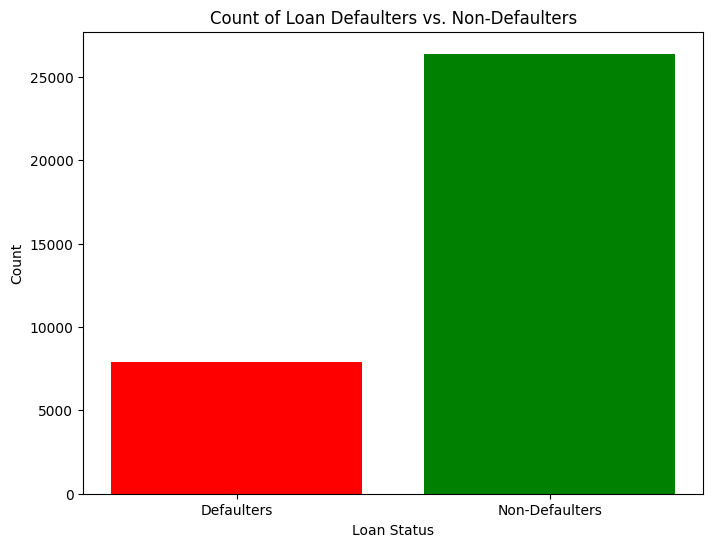

In [106]:
# As profile_birth_date_x and profile_birth_date_x have high number of mising values also this feature iS not much relevnt to ml or prediction so we can drop
#it at our feature enginnering step

#PPERFORMING EDA STARTS--------------
#I AM  TAKING count of loan defaulter vs non defaulter
import matplotlib.pyplot as plt
import seaborn as sns

defaulters_count =final_readydf1[final_readydf1['loan_status']==7].shape[0]
non_defaulters_count=final_readydf1[final_readydf1['loan_status']==2].shape[0]
plt.figure(figsize=(8,6))
plt.bar(['Defaulters','Non-Defaulters'],[defaulters_count, non_defaulters_count],color=['red', 'green'])
plt.title('Count of Loan Defaulters vs. Non-Defaulters')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

#FROM THE DOWNWARD PLOT WE CAN IDENTIFY THAT NON DEFAULTER ARE IN NUMBERS OF 2LAK WHERE AS NON DEFUALTER ARE HOW PAY LOAN ARE MORE THAN 8LAKH



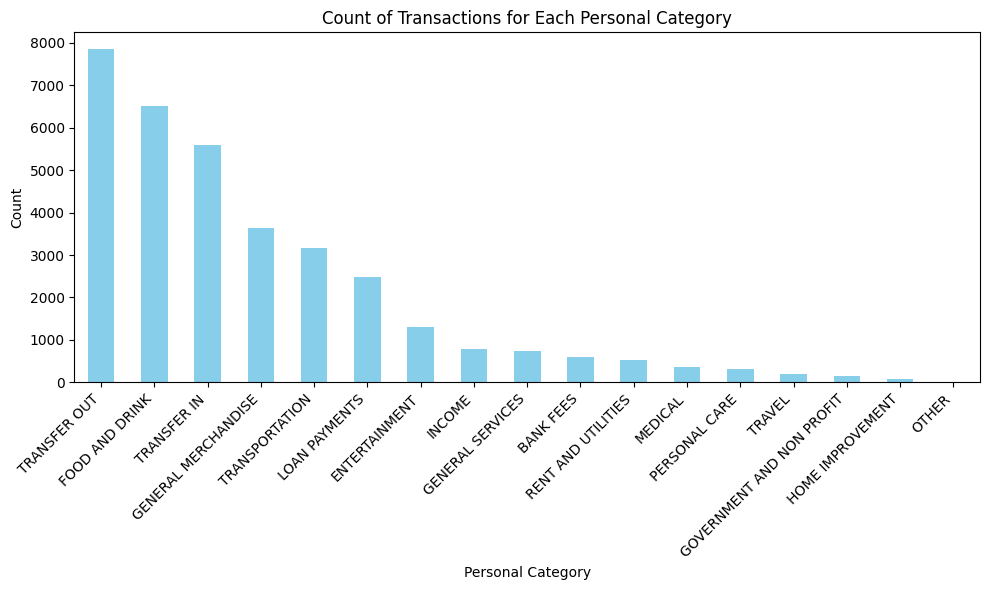

In [107]:
#PLOT OF TRANSACTION COUNTS
transaction_counts = final_readydf1['trans_personal_category'].value_counts()
plt.figure(figsize=(10, 6))
transaction_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Transactions for Each Personal Category')
plt.xlabel('Personal Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#FROM THIS PLOT WE CAN IDENTIFY THAT TRANSACTION HIGHEST MADE FOR WAS TRANSFER OT AND FOOD AND DRING WITH LOWEST FOR HOME IMPROVEMENT----------------

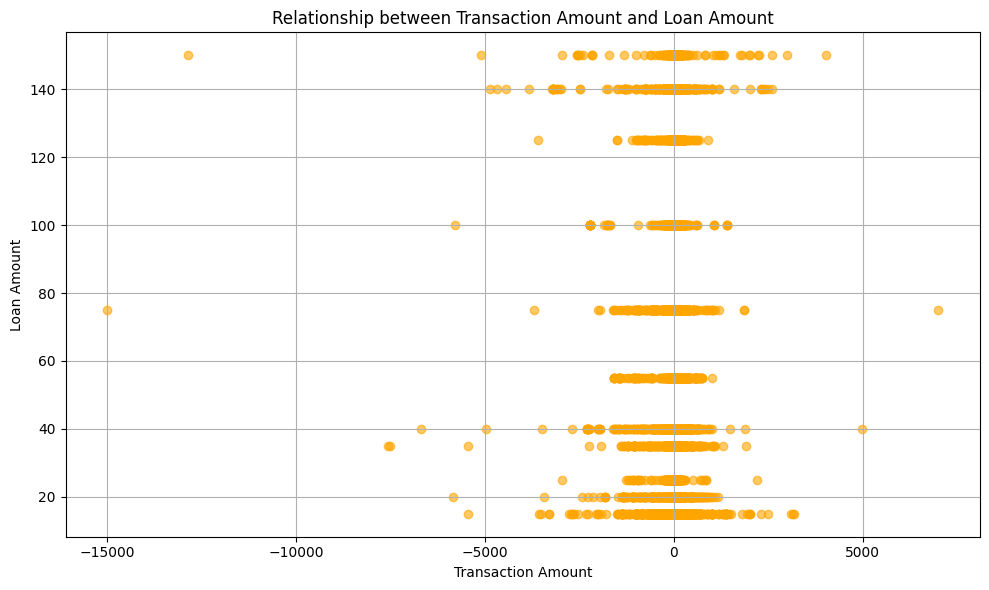

In [109]:
#relationship between transaction amount and loan amount------------------------------

plt.figure(figsize=(10, 6))
plt.scatter(final_readydf1['trans_amount'],final_readydf1['loan_amount'],color='orange', alpha=0.6)
plt.title('Relationship between Transaction Amount and Loan Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


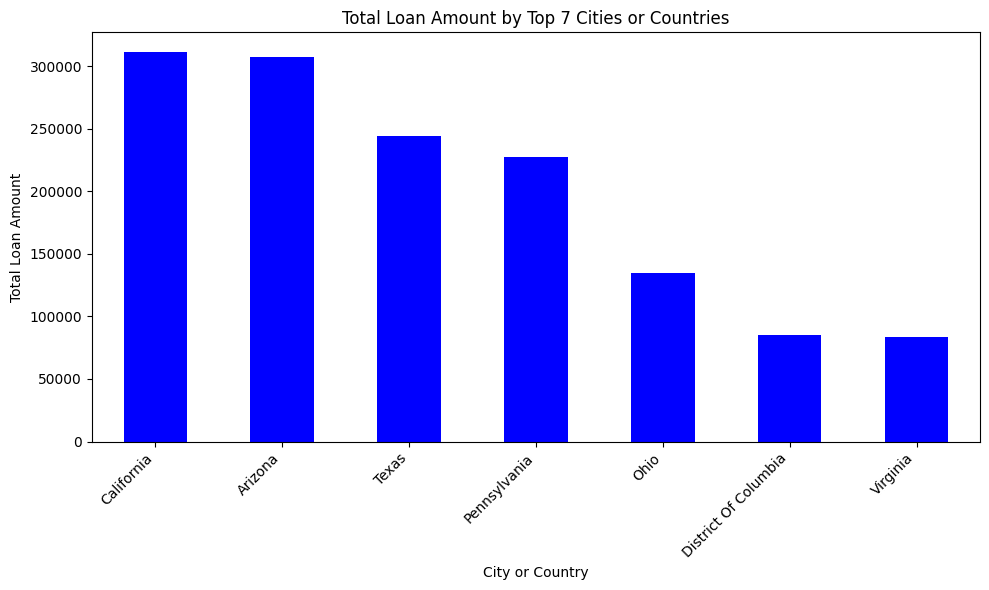

In [110]:
#CITY WHICH HAS TAKEN MAXIMUM LOAN top 7 country------------------------

loan_amount_by_city=final_readydf1.groupby('profile_residence_state')['loan_amount'].sum()

top_countries=loan_amount_by_city.sort_values(ascending=False).head(7)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='blue')
plt.title('Total Loan Amount by Top 7 Cities or Countries')
plt.xlabel('City or Country')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

#WE CAN IDENTIFY AUSTIN IS HIGHEST COUNTRY TAKEN LOAN

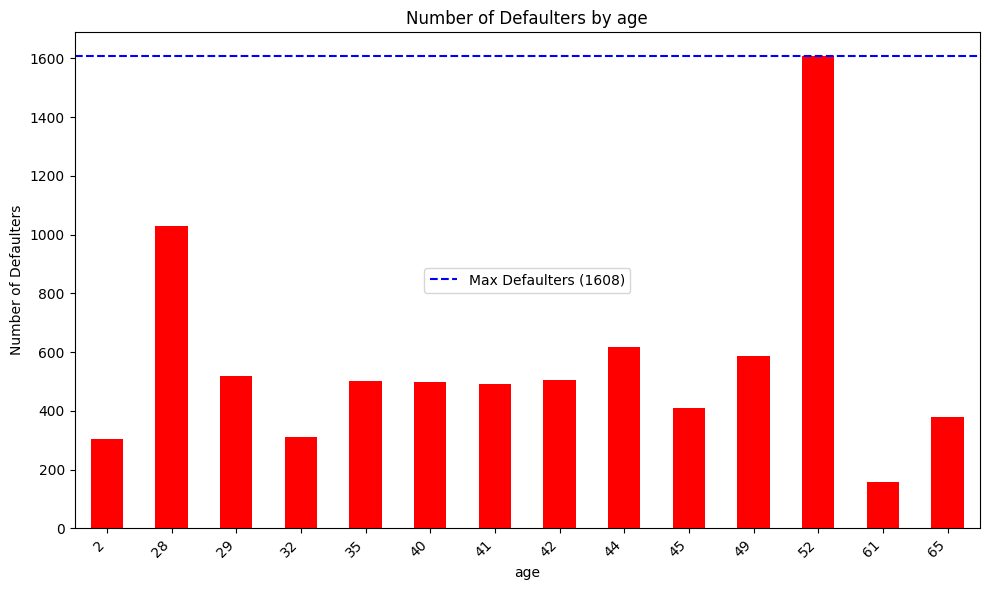

In [112]:
# Group by country and loan status to count the number of defaulters-------------------------
defaulter_counts=final_readydf1[final_readydf1['loan_status']==7].groupby('age').size()
max_defaulter_country=defaulter_counts.idxmax()
max_defaulter_count=defaulter_counts.max()
plt.figure(figsize=(10, 6))
defaulter_counts.plot(kind='bar', color='red')
plt.title('Number of Defaulters by age')
plt.xlabel('age')
plt.ylabel('Number of Defaulters')
plt.xticks(rotation=45, ha='right')  
plt.axhline(y=max_defaulter_count, color='blue', linestyle='--', label=f'Max Defaulters ({max_defaulter_count})')
plt.legend()
plt.tight_layout()
plt.show()
# from below graph we can find hiighest defaulter is of from florida and lowest from virginia

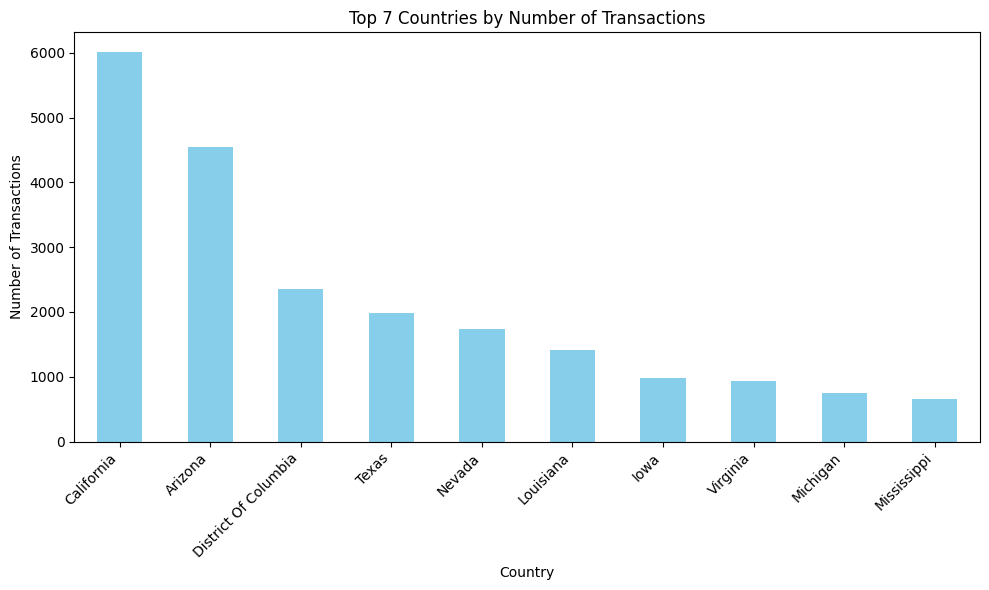

In [113]:
#MAXIMUM TRANSACTION MONTH WISE l
max_transaction=final_readydf1.groupby('profile_residence_state')['trans_amount'].sum()
plt.figure(figsize=(10, 6))
top_transaction_counts = max_transaction.sort_values(ascending=False).head(10)
top_transaction_counts.plot(kind='bar', color='skyblue')
plt.title('Top 7 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()
#TOP TRANSACTION ARE MADE BY CALIFORNIA AND LOWEST TENNESSE

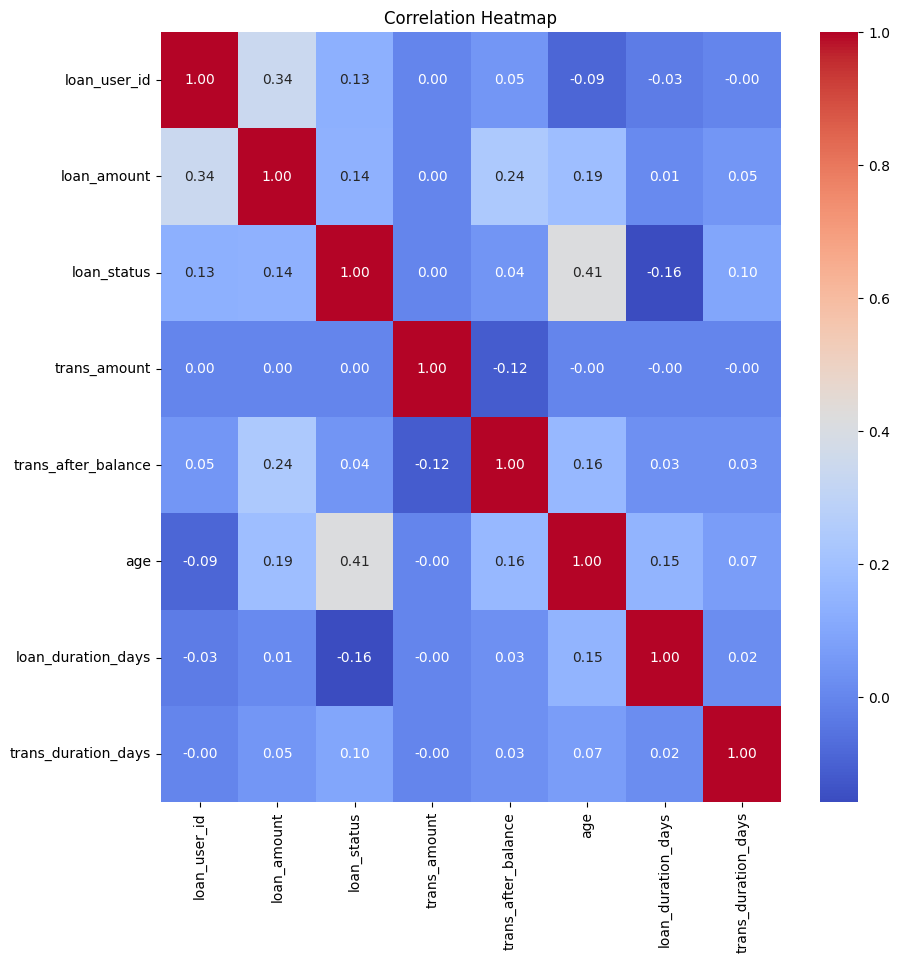

In [114]:
numeric_cols=final_readydf1.select_dtypes(include=['float64', 'int64']).columns
categorical_cols=final_readydf1.select_dtypes(include=['object']).columns
df_numeric=final_readydf1[numeric_cols]
corr_matrix=df_numeric.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [115]:

df_filtered=final_readydf1[final_readydf1['age'] >= 12]
Q1=df_filtered['age'].quantile(0.25)
Q3=df_filtered['age'].quantile(0.75)

IQR=Q3-Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
df_filtered=df_filtered[(df_filtered['age'] >= lower_bound) & (df_filtered['age'] <= upper_bound)]
num_removed=df.shape[0] - df_filtered.shape[0]
print(f"Number of rows removed: {num_removed}")




Number of rows removed: 6085


In [39]:
ready_df1=df_filtered

In [116]:
#VIF TO ELIMINATE CORRELATED FEATURE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def get_vif(ready_df1):
    vif=pd.DataFrame()
    vif["variables"]=ready_df1.columns
    vif["VIF"] = [ variance_inflation_factor(ready_df1.values, i) for i in range(ready_df1.shape[1])]
    
    return vif

In [41]:

not_for_vif = [ "loan_amount", "loan_duration_days", "profile_residence_state", "repay_year","trans_amount","age","loan_status"]
get_vif(ready_df1[[i for i in ready_df1.describe().columns if i not in not_for_vif]])

,variables,VIF
0,loan_user_id,14.350038
1,trans_after_balance,1.276561
2,repay_month,13.554311
3,repay_day,2.627107
4,trans_duration_days,2.710388


In [43]:
#HERE WE CAN DROP LOAN_USER_ID
getsetdf1=ready_df.drop(columns=['loan_user_id'],axis =1)


In [ ]:
#WE WILL DO ONE HOT ENCODING BUT I DID MANULLAY FOR STATES 

In [44]:
getsetdf1['profile_residence_state']=getsetdf1.profile_residence_state.map({'Arkansas':1, 'Texas':2, 'North Carolina':3, 'Arizona':4, 'Ohio':5,
       'California':6, 'Florida':7, 'Virginia':8, 'New York':9, 'Pennsylvania':10,
       'Indiana':11, 'New Jersey':12, 'Oklahoma':13, 'Mississippi':14, 'Washington':15,
       'Michigan':16, 'Oregon':17, 'Colorado':18, 'Iowa':19, 'Louisiana':20,
       'District Of Columbia':21, 'Nevada':22, 'Missouri':23, 'Massachusetts':24})
df55=getsetdf1.drop(columns=['trans_personal_category'],axis =1)


                                                                        

In [45]:
df55.head(10)


,loan_amount,loan_status,profile_residence_state,trans_amount,trans_after_balance,age,loan_duration_days,repay_year,repay_month,repay_day,trans_duration_days
2159,75.0,7,1,-10.00,-135.69,32,18,2022,5,20,136
2160,75.0,7,1,10.14,-145.83,32,18,2022,5,20,135
2161,75.0,7,1,-1.00,-144.83,32,18,2022,5,20,134
2162,75.0,7,1,23.00,-167.83,32,18,2022,5,20,133
2163,75.0,7,1,-27.28,-140.55,32,18,2022,5,20,133
2164,75.0,7,1,-19.70,-120.85,32,18,2022,5,20,133
2165,75.0,7,1,2.96,-123.81,32,18,2022,5,20,132
2166,75.0,7,1,-16.00,-107.81,32,18,2022,5,20,132
2167,75.0,7,1,-14.00,-93.81,32,18,2022,5,20,132
2168,75.0,7,1,10.00,-103.81,32,18,2022,5,20,132


In [46]:
#TRAINING AND TESTING MODEL
from sklearn.model_selection import train_test_split
X = df55.drop(columns=['loan_status'],axis=1)
y = df55['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (22573, 10)
Shape of y_train :  (22573,)
Shape of X_test :  (5644, 10)
Shape of y_test :  (5644,)


In [ ]:
#SCALING OUR DATASET 

In [47]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
log_reg=LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_score=log_reg.score(X_test, y_test)
print("Logistic Regression accuracy:",log_reg_score)

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
dec_tree_score = dec_tree.score(X_test, y_test)
print("Decision Tree accuracy:",dec_tree_score)


Logistic Regression accuracy: 0.8284904323175053
Decision Tree accuracy: 1.0


In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
clf_rf=RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred_rf=clf_rf.predict(X_test)
accuracy_rf=accuracy_score(y_test, y_pred_rf)
print("Random Forest accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

clf_lr=LogisticRegression(max_iter=1000)
clf_lr.fit(X_train, y_train)
y_pred_lr=clf_lr.predict(X_test)

accuracy_lr=accuracy_score(y_test, y_pred_lr)
print("Logistic Regression accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
clf_dt=DecisionTreeClassifier(max_depth=5)
clf_dt.fit(X_train, y_train)
y_pred_dt=clf_dt.predict(X_test)

accuracy_dt=accuracy_score(y_test, y_pred_dt)
print("Decision Tree (limited depth) accuracy:", accuracy_dt)
print("Decision Tree (limited depth) Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree (limited depth) Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Random Forest accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00      4285
           7       1.00      1.00      1.00      1359

    accuracy                           1.00      5644
   macro avg       1.00      1.00      1.00      5644
weighted avg       1.00      1.00      1.00      5644

Random Forest Confusion Matrix:
 [[4285    0]
 [   0 1359]]
Logistic Regression accuracy: 0.8315024805102764
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           2       0.85      0.95      0.90      4285
           7       0.74      0.46      0.57      1359

    accuracy                           0.83      5644
   macro avg       0.79      0.71      0.73      5644
weighted avg       0.82      0.83      0.82      5644

Logistic Regression Confusion Matrix:
 [[4063  222]
 [ 729  630]]
Decision Tree (limited depth) accuracy: 0.9656272147413182
De

In [58]:
from sklearn.model_selection import cross_val_score

cv_scores_rf=cross_val_score(clf_rf, X, y, cv=5)
print("Random Forest cross-validation accuracy:", cv_scores_rf.mean())

cv_scores_lr=cross_val_score(clf_lr, X, y, cv=5)
print("Logistic Regression cross-validation accuracy:", cv_scores_lr.mean())

cv_scores_dt=cross_val_score(clf_dt, X, y, cv=5)
print("Decision Tree cross-validation accuracy:", cv_scores_dt.mean())


Random Forest cross-validation accuracy: 0.653640053537476
Logistic Regression cross-validation accuracy: 0.7449023538881423
Decision Tree cross-validation accuracy: 0.6300710299684524


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
data = df55
feature_columns = ['profile_residence_state', 'age', 'loan_duration_days', 
                   'trans_amount', 'loan_amount', 'trans_after_balance', 
                   'repay_year', 'repay_month', 'repay_day']
target_column = 'loan_status' 
X=data[feature_columns]
y=data[target_column]
rf_model=RandomForestClassifier()
rf_model.fit(X, y)

lr_model=LogisticRegression()
lr_model.fit(X, y)

dt_model=DecisionTreeClassifier()
dt_model.fit(X, y)
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
with open('random_forest_model.pkl', 'rb') as file:
    loaded_random_forest_model = pickle.load(file)

with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_logistic_regression_model = pickle.load(file)

with open('decision_tree_model.pkl', 'rb') as file:
    loaded_decision_tree_model = pickle.load(file)



input_data = pd.DataFrame({
    'profile_residence_state': [6],
    'age': [30],
    'loan_duration_days': [50], 
    'trans_amount': [-100.50],
    'loan_amount': [75.0],
    'trans_after_balance': [1002.70],
    'repay_year': [2022],
    'repay_month': [10],
    'repay_day': [60]
})

# Assuming StandardScaler was used for preprocessing during training
sc = StandardScaler()
# Fit scaler on the original training data (assuming X_train is available)
sc.fit(X_train)

# Transform the input data using the same scaler
input_data_scaled = sc.transform(input_data)

predictions_rf=loaded_random_forest_model.predict(input_data)
predictions_lr=loaded_logistic_regression_model.predict(input_data)
predictions_dt=loaded_decision_tree_model.predict(input_data)

def print_prediction(model_name, prediction):
    if prediction==7:
        print(f"The individual is predicted TO default on the loan by {model_name}.")
    else:
        print(f"The individual is predicted not to default on the loan by {model_name}.")
print_prediction("Random Forest", predictions_rf[0])
print_prediction("Logistic Regression", predictions_lr[0])
print_prediction("Decision Tree", predictions_dt[0])


The individual is predicted not to default on the loan by Random Forest.
The individual is predicted not to default on the loan by Logistic Regression.
The individual is predicted not to default on the loan by Decision Tree.


In [126]:
print("Random Forest Probabilities:", loaded_random_forest_model.predict_proba(input_data_scaled))
print("Logistic Regression Probabilities:", loaded_logistic_regression_model.predict_proba(input_data_scaled))
print("Decision Tree Probabilities:", loaded_decision_tree_model.predict_proba(input_data_scaled))


Random Forest Probabilities: [[0.61 0.39]]
Logistic Regression Probabilities: [[0.91095409 0.08904591]]
Decision Tree Probabilities: [[0. 1.]]


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the models
with open('random_forest_model.pkl', 'rb') as file:
    loaded_random_forest_model = pickle.load(file)

with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_logistic_regression_model = pickle.load(file)

with open('decision_tree_model.pkl', 'rb') as file:
    loaded_decision_tree_model = pickle.load(file)

# Assuming you have access to the original training data to fit the scaler
# This is critical to ensure the scaling is consistent
# X_train should be the same data you used to train your models
# sc = StandardScaler().fit(X_train)
# Save and load the scaler to maintain consistency
# Example:
# with open('scaler.pkl', 'wb') as file:
#     pickle.dump(sc, file)

# Assuming you have saved the scaler
with open('scaler.pkl', 'rb') as file:
    sc = pickle.load(file)

# Input data
input_data = pd.DataFrame({
    'profile_residence_state': [6],
    'age': [30],
    'loan_duration_days': [50], 
    'trans_amount': [-100.50],
    'loan_amount': [75.0],
    'trans_after_balance': [1002.70],
    'repay_year': [2022],
    'repay_month': [10],
    'repay_day': [60]
})

# Transform the input data using the same scaler
input_data_scaled = sc.transform(input_data)

# Predictions
predictions_rf = loaded_random_forest_model.predict(input_data_scaled)
predictions_lr = loaded_logistic_regression_model.predict(input_data_scaled)
predictions_dt = loaded_decision_tree_model.predict(input_data_scaled)

# Prediction probabilities
proba_rf = loaded_random_forest_model.predict_proba(input_data_scaled)
proba_lr = loaded_logistic_regression_model.predict_proba(input_data_scaled)
proba_dt = loaded_decision_tree_model.predict_proba(input_data_scaled)

# Print probabilities for debugging
print("Random Forest Probabilities:", proba_rf)
print("Logistic Regression Probabilities:", proba_lr)
print("Decision Tree Probabilities:", proba_dt)

# Print prediction
def print_prediction(model_name, prediction):
    if prediction == 7:
        print(f"The individual is predicted TO default on the loan by {model_name}.")
    else:
        print(f"The individual is predicted not to default on the loan by {model_name}.")

print_prediction("Random Forest", predictions_rf[0])
print_prediction("Logistic Regression", predictions_lr[0])
print_prediction("Decision Tree", predictions_dt[0])
